In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

**What is machine learning?**

Machine learning is a collection of tools and techniques that turns data into decision.

In [2]:
advertising=pd.read_csv('/content/advertising.csv')                                                #import the data
advertising['Sales Category']=np.where(advertising['Sales']>=15,'High','Low')                      #categorize sales to high and low

**Problem Statement**

Develop a machine learning model that predicts the monthly sale or sales category based on the advertisement made.

**Input for Machine Learning Model**

In [3]:
advertising.iloc[1,0:3]                                                #print a row of the dataframe from column 0 to 2

,1
TV,44.5
Radio,39.3
Newspaper,45.1


**Example of Problem Statement**

If we spend 44.5 dollars in tv, 39.3 dollars in radio and 45.1 dollars in newspaper advertisement, how much our monthly sales should be?

**Output for Machine Learning Model**

In [4]:
advertising.iloc[1,3:5]                                                 #print a row of the dataframe from column 3 to 4

,1
Sales,10.4
Sales Category,Low


**Example of Output**

The machine learning model will tell us our sales will be around Ten thousand dollars or low.

**How do we achieve such machine learning model?**

*   We collect historical data.
*   We train a machine learning model with historical data.
*   We train multiple machine learning models and compare accuracy.
*   We select the model with better accuracy.



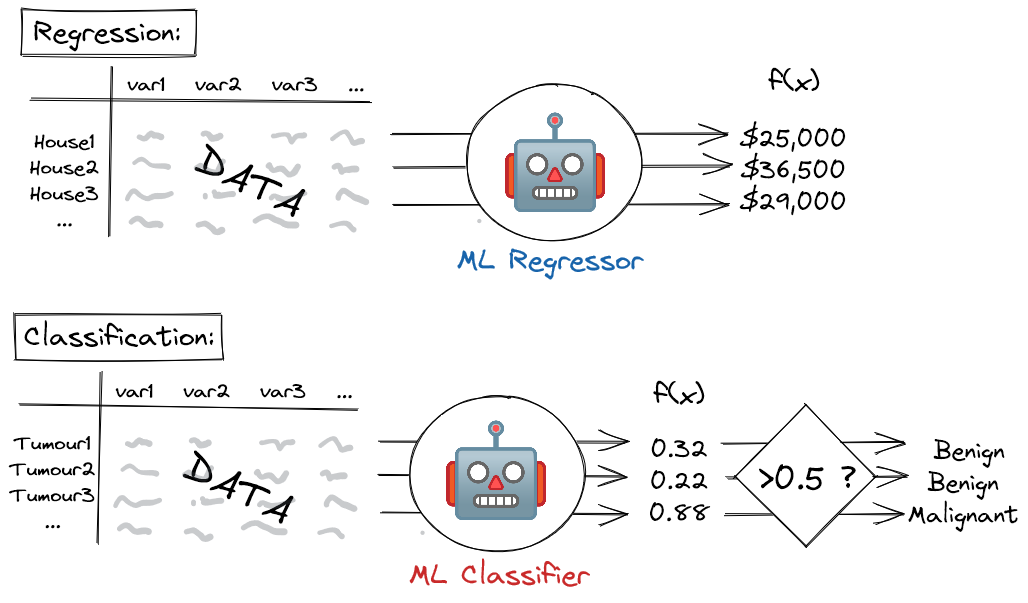

**Types of Machine Learning Models**



*   Regressor: Predicts a quantity. e.g. Sales is going to be around Ten thousand dollars.
*   Classifier: Classify into a group. e.g. Sales is going to be low instead of high.



In [5]:
advertising.head()                                                                 #print first few rows of the dataframe

,TV,Radio,Newspaper,Sales,Sales Category
0,230.1,37.8,69.2,22.1,High
1,44.5,39.3,45.1,10.4,Low
2,17.2,45.9,69.3,12.0,Low
3,151.5,41.3,58.5,16.5,High
4,180.8,10.8,58.4,17.9,High


**Data**


*   TV, Radio, Newspaper: Amount of dollar spent on adverstisement per month.
*   Sales: Amount of dollar (in thousand) earned in sales per month.
*   Sales Category: The category the amount of sales falls into.



**Data Cleaning**

**Check Column Information**

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TV              200 non-null    float64
 1   Radio           200 non-null    float64
 2   Newspaper       200 non-null    float64
 3   Sales           200 non-null    float64
 4   Sales Category  200 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


**Check Descriptive Statistics**

In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Check for Duplicate Columns**

In [8]:
advertising.duplicated().sum()

0

**Check for Missing Values**

In [9]:
advertising.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0
Sales Category,0


**Check for Outliers**

<Axes: >

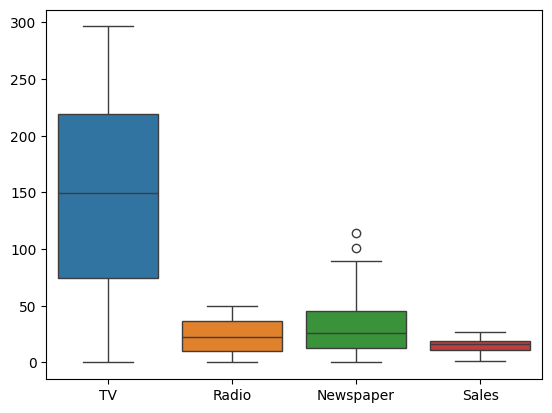

In [10]:
sns.boxplot(data=advertising)

**Variables**


*   Dependent Variable or Predicted: The column, in a dataset, that is being predicted. The output of a machine learning alogrithm. e.g. Sales, Sales Category.
*   Independent Variables or Feature or Predictor: The columns, in a dataset, that predicts the predictor. The input of a machine learning algorithm. The influence of the dependent variable. e.g. TV, Radio, Newspaper.



**Split Data into Dependent and Independent Variables for Training**

In [11]:
x=advertising.drop(['Sales','Sales Category'],axis=1)
y=advertising['Sales']

**Independent Variables**

In [12]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


**Dependent Variable**

In [13]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


**What is Training?**

Training is the process of teaching a machine learning algorithm to detect patterns and predict outcomes by exposing it to labeled data.




**How does an algorithm learn patterns**

*   Choose a machine learning model to its initial stage.
*   Model makes initial prediction based on independent variable values and initial model parameters.
*   Compares initial prediction with original value to see the difference.
*   Updates parameters to make better prediction the next time.
*   Repeats step 2, 3 and 4 until the best parameters are found.



In [14]:
model=LinearRegression()
model.fit(x,y)                                                #training the model

LinearRegression()

In [15]:
x.loc[1]

,1
TV,44.5
Radio,39.3
Newspaper,45.1


In [16]:
y.loc[1]

10.4

**Training Process Example**

Instead of predicting 10.4, the model initially predicts 0 (or some other random value). There's a big difference between 10.4 and 0. The training process will reiterate itself until 0 becomes 10.4 or something closer to 10.4. The training will reiterate with the help of the historical data we have.

In [17]:
model.predict([x.loc[1]])                                                   #predict one row

array([11.26824775])

**Accuracy**

 After spending 44.5 dollars in tv, 39.3 dollars in radio and 45.1 dollars in newspaper, the sales for that month was 10.4 thousand dollars. But the model predicted it will be 11.32 thousand dollars. So, there's a gap between the prediction and the actual value. This gap will tell us about the accuracy of the model. Before learning about accuracy, we need to learn about training and test data.

In [18]:
model.score(x,y)

0.9025912899684558

**Overfitting**

*   Using the same data to train and calculate accuracy may cause overfitting.
*   Overfitting: Model performs better for the training data in terms of accuracy but fails to give accurate predictions when it faces data outside of the training data.
*   Model should perform good for data that are not in the training data.



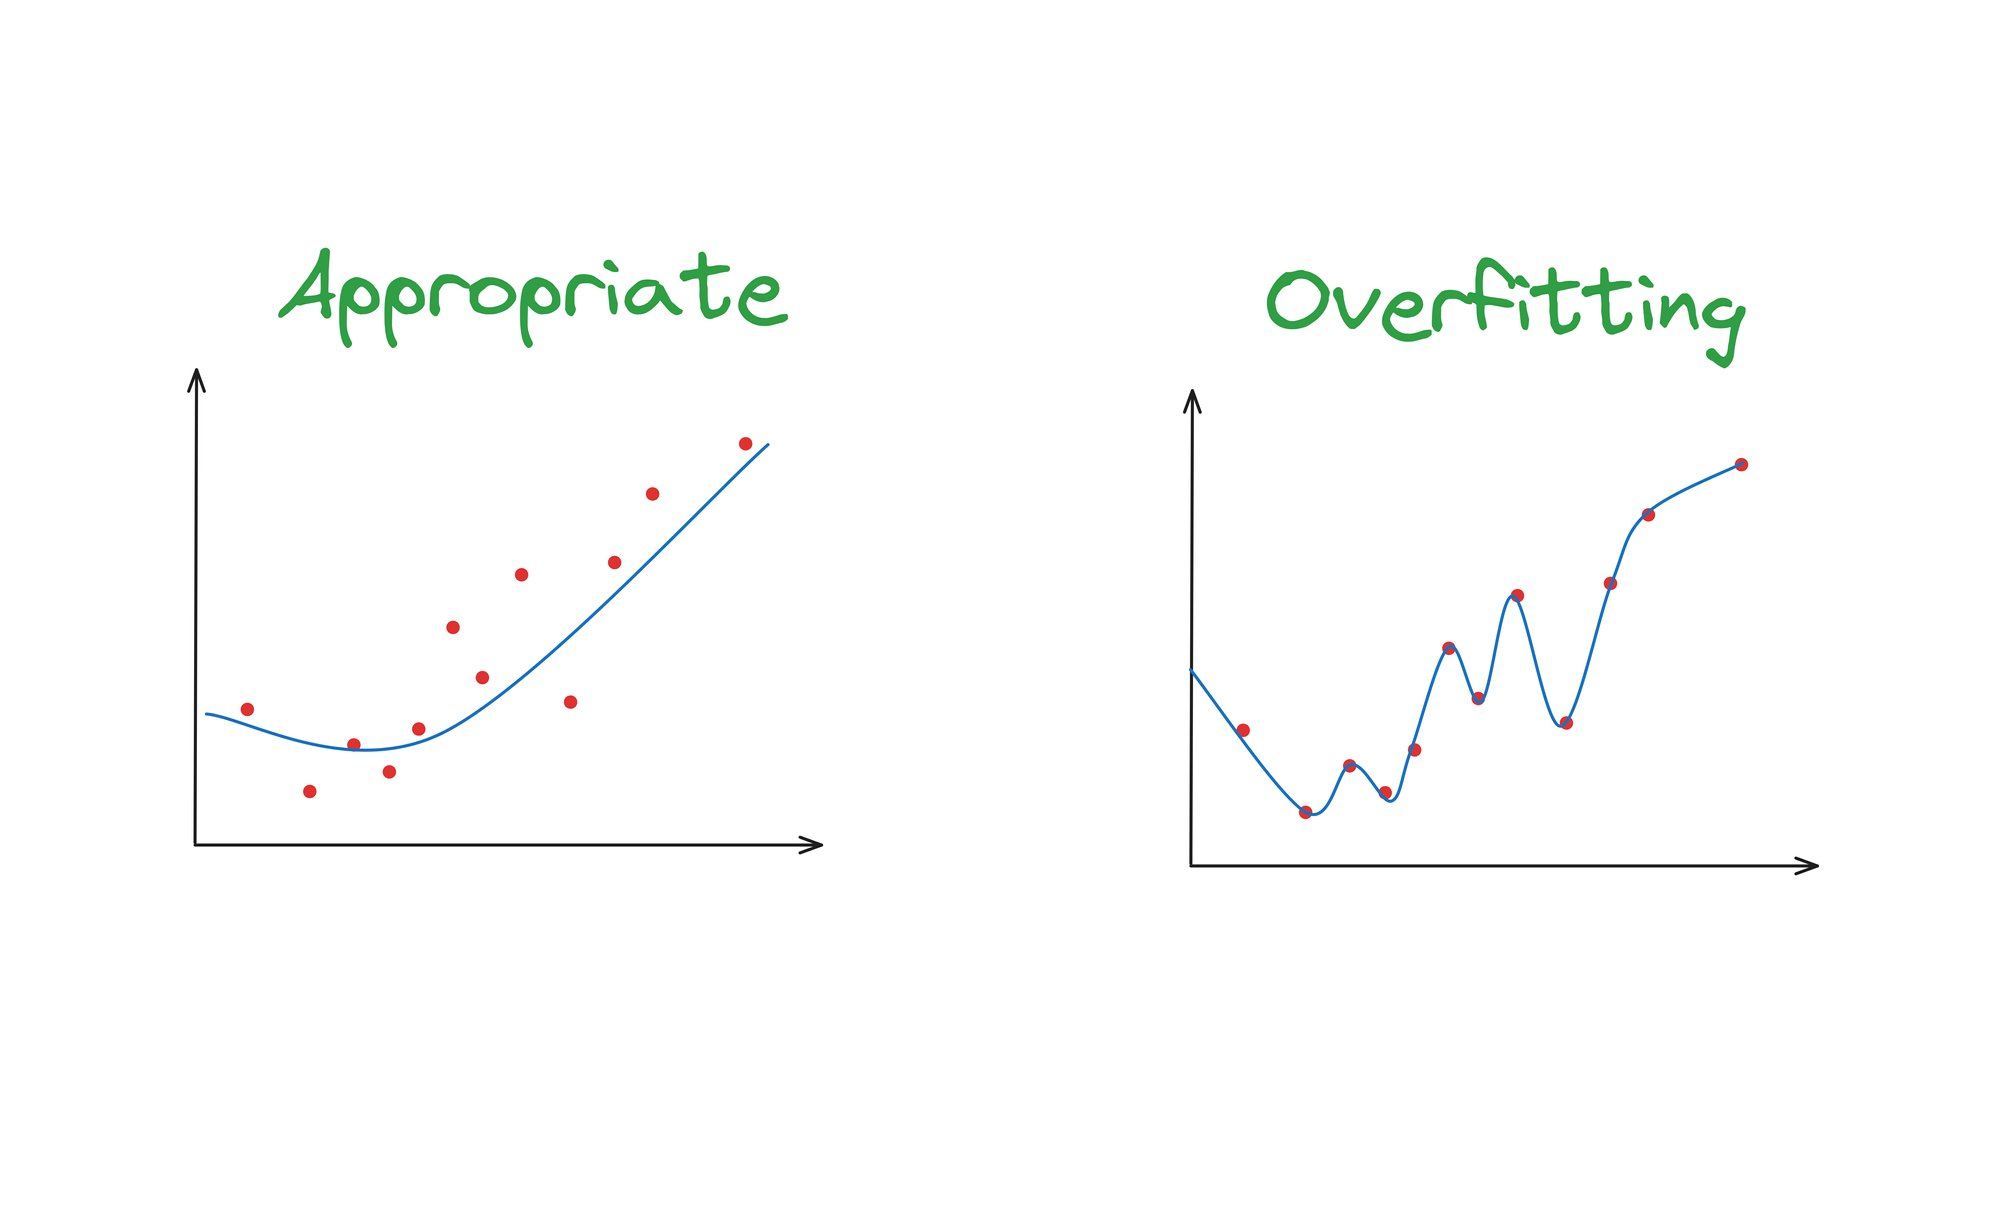

**Splitting into Training and Test data**

Data will be split into two sets of data:


*   Training data: This data will be used to train the model.
*   Testing data: This data will be used to assess the model's accuracy.



In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [20]:
x_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
148,38.0,40.3,11.9
112,175.7,15.4,2.4
8,8.6,2.1,1.0
138,43.0,25.9,20.5
...,...,...,...
177,170.2,7.8,35.2
4,180.8,10.8,58.4
84,213.5,43.0,33.8
49,66.9,11.7,36.8


In [21]:
y_train

,Sales
26,15.0
148,10.9
112,17.1
8,4.8
138,9.6
...,...
177,16.7
4,17.9
84,21.7
49,9.7


In [22]:
x_test

,TV,Radio,Newspaper
83,68.4,44.5,35.6
13,97.5,7.6,7.2
178,276.7,2.3,23.7
137,273.7,28.9,59.7
7,120.2,19.6,11.6
15,195.4,47.7,52.9
181,218.5,5.4,27.4
12,23.8,35.1,65.9
139,184.9,43.9,1.7
188,286.0,13.9,3.7


In [23]:
y_test

,Sales
83,13.6
13,13.7
178,16.8
137,20.8
7,13.2
15,22.4
181,17.2
12,9.2
139,20.7
188,20.9


**Why do we split into training and test data?**

The model learns from the training data. It learns patterns from the training data and predicts from its learnings. If we assess the model accuracy from the same data, it's supposed to give us good result. So, if we need more reliable accuracy, we need to assess the model accuracy from a data that is unknown to the model.



In [24]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
model.score(x_train,y_train)

0.9044797459065483

In [26]:
model.score(x_test,y_test)

0.8199169548234199

**How are we getting accuracy?**

In [27]:
yPred=model.predict(x_test)
u=(y_test-yPred)**2
v=(y_test-y_test.mean())**2
accuracy=1-(u.sum()/v.sum())
print(accuracy)

0.8199169548234199


The above accuracy metric is called the R-squared method. There are more metrics such as MAE, MSE and RMSE.

**Train a model other than regression to compare**

**Support Vector Regression**

In [28]:
modelSVR=SVR(kernel='linear')
modelSVR.fit(x_train,y_train)

SVR(kernel='linear')

In [29]:
modelSVR.score(x_test,y_test)

0.8435004804211892

In [30]:
modelSVR.score(x_train,y_train)

0.902669728793914

We trained a regressor so far, we are going to train a classifier next.


In [31]:
x_cat=advertising.drop(['Sales','Sales Category'],axis=1)
y_cat=advertising['Sales Category']

In [32]:
x_cat_train,x_cat_test,y_cat_train,y_cat_test=train_test_split(x_cat,y_cat,test_size=0.1)

In [33]:
x_cat_test

,TV,Radio,Newspaper
142,220.5,33.2,37.9
83,68.4,44.5,35.6
141,193.7,35.4,75.6
187,191.1,28.7,18.2
154,187.8,21.1,9.5
78,5.4,29.9,9.4
6,57.5,32.8,23.5
1,44.5,39.3,45.1
77,120.5,28.5,14.2
133,219.8,33.5,45.1


In [34]:
y_cat_test

,Sales Category
142,High
83,Low
141,High
187,High
154,High
78,Low
6,Low
1,Low
77,Low
133,High


**Training a Logistic Regression**

In [35]:
modelLogit=LogisticRegression()
modelLogit.fit(x_cat_train,y_cat_train)

LogisticRegression()

In [36]:
modelLogit.score(x_cat_test,y_cat_test)

1.0

**How are we getting accuracy**

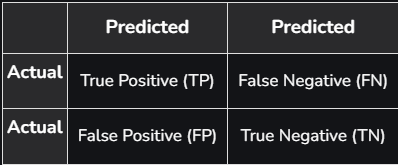

In [37]:
predictionLogit=modelLogit.predict(x_cat_test)
metrics.confusion_matrix(y_cat_test,predictionLogit)

array([[13,  0],
       [ 0,  7]])

In [38]:
predictionLogitDf=pd.DataFrame(predictionLogit,index=x_cat_test.index,columns=['Prediction'])
pd.concat([x_cat_test,y_cat_test,predictionLogitDf],axis=1)

,TV,Radio,Newspaper,Sales Category,Prediction
142,220.5,33.2,37.9,High,High
83,68.4,44.5,35.6,Low,Low
141,193.7,35.4,75.6,High,High
187,191.1,28.7,18.2,High,High
154,187.8,21.1,9.5,High,High
78,5.4,29.9,9.4,Low,Low
6,57.5,32.8,23.5,Low,Low
1,44.5,39.3,45.1,Low,Low
77,120.5,28.5,14.2,Low,Low
133,219.8,33.5,45.1,High,High


**Training a Support Vector Classifier**

In [39]:
modelSVC=SVC()
modelSVC.fit(x_cat_train,y_cat_train)

SVC()

In [40]:
modelSVC.score(x_cat_test,y_cat_test)

1.0

In [41]:
predictionSVC=modelSVC.predict(x_cat_test)
metrics.confusion_matrix(y_cat_test,predictionSVC)

array([[13,  0],
       [ 0,  7]])

In [42]:
preditionSVCDf=pd.DataFrame(predictionSVC,index=x_cat_test.index,columns=['Prediction'])
pd.concat([x_cat_test,y_cat_test,predictionLogitDf],axis=1)

,TV,Radio,Newspaper,Sales Category,Prediction
142,220.5,33.2,37.9,High,High
83,68.4,44.5,35.6,Low,Low
141,193.7,35.4,75.6,High,High
187,191.1,28.7,18.2,High,High
154,187.8,21.1,9.5,High,High
78,5.4,29.9,9.4,Low,Low
6,57.5,32.8,23.5,Low,Low
1,44.5,39.3,45.1,Low,Low
77,120.5,28.5,14.2,Low,Low
133,219.8,33.5,45.1,High,High


**K-Fold Cross Validation**

*   Divide the dataset into K parts.
*   Train the model with K-1 parts and test the model with a remaining part.
*   If we iterate this K times, we'll get K models and K accuracies.
*   The average accuracy will tell us about the better model to use.



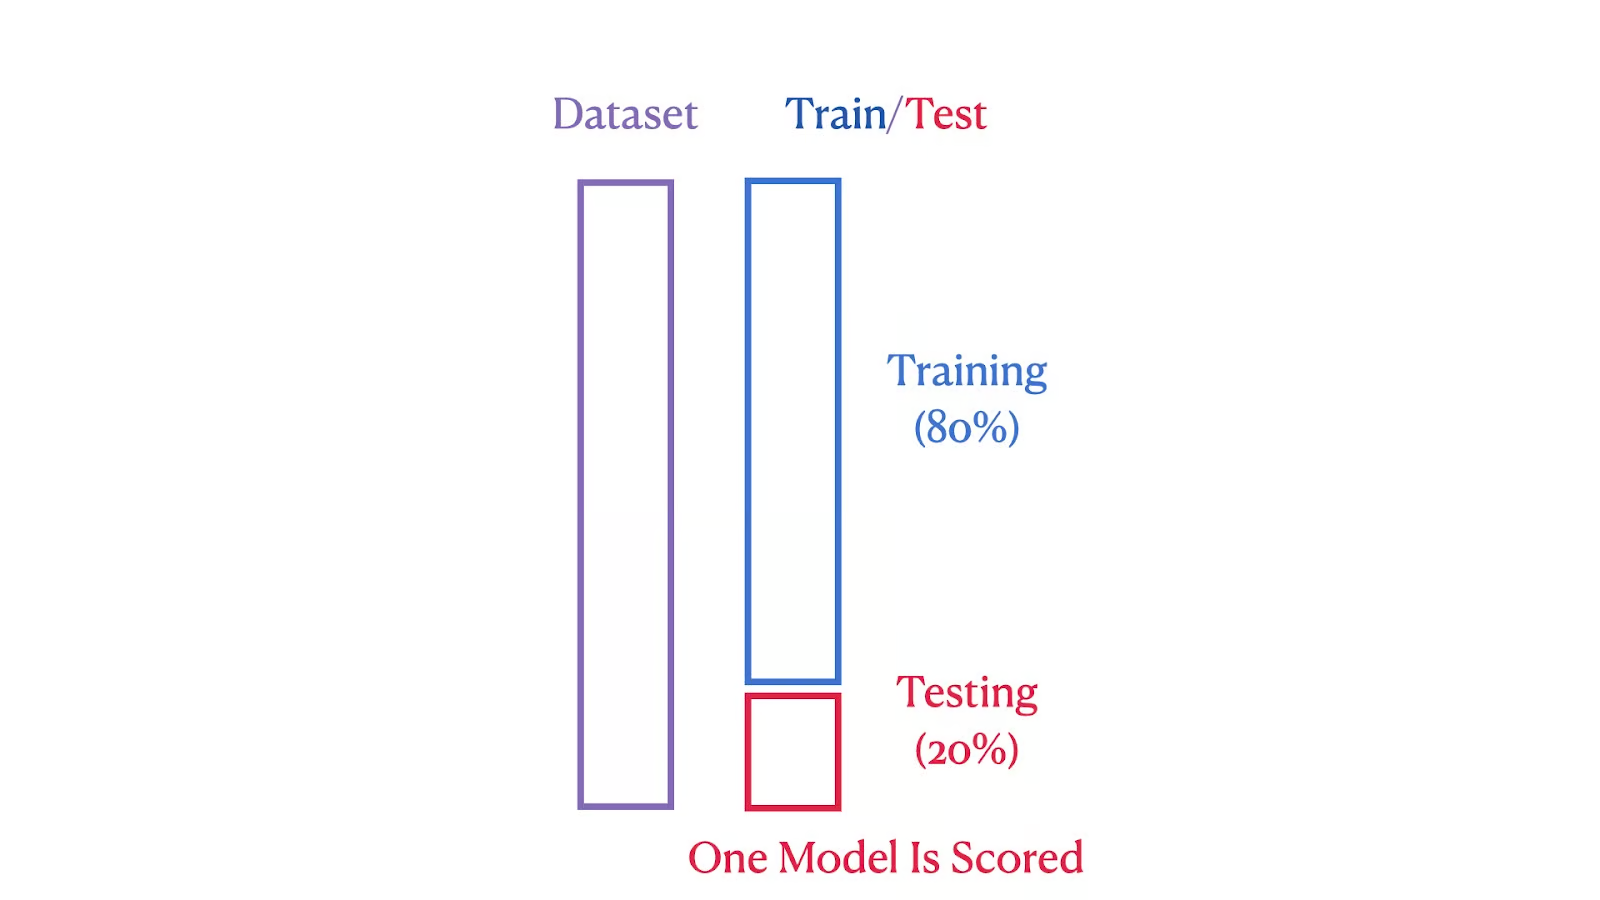

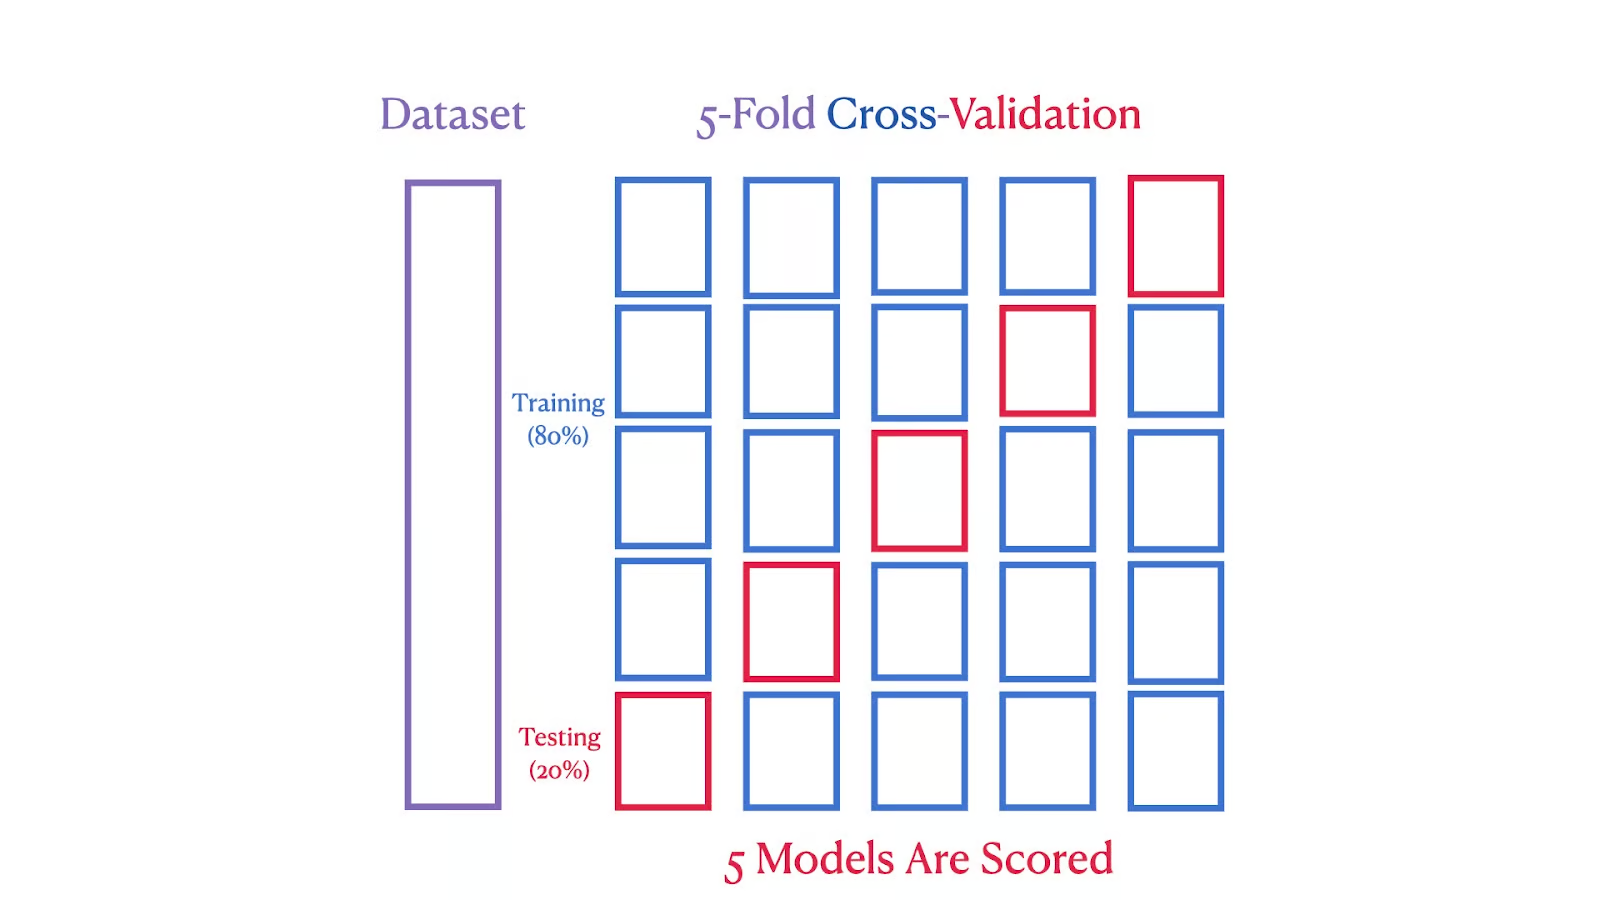

In [43]:
folds=5                                                                             #setting the number of folds for cross-validation
kfold=KFold(n_splits=folds,shuffle=True)

In [44]:
crossValLinear=cross_val_score(model,x,y,cv=kfold)                                  #accuracy score of each fold of the cross-validation for linear regression
crossValLinear

array([0.91078233, 0.86587452, 0.89319211, 0.90352729, 0.92389073])

In [45]:
crossValLinear.mean()                                                              #mean accuracy of the linear regression

0.8994533981472005

In [46]:
crossValSVR=cross_val_score(modelSVR,x,y,cv=kfold)
crossValSVR

array([0.91482089, 0.87062544, 0.90326021, 0.92064527, 0.86260677])

In [47]:
crossValSVR.mean()

0.8943917165739794

In [48]:
crossValLogit=cross_val_score(modelLogit,x_cat,y_cat,cv=kfold)
crossValLogit

array([1.   , 1.   , 1.   , 0.925, 0.925])

In [49]:
crossValLogit.mean()

0.97

In [50]:
crossValSVC=cross_val_score(modelSVC,x_cat,y_cat,cv=kfold)
crossValSVC

array([0.975, 0.95 , 0.975, 0.95 , 0.975])

In [51]:
crossValSVC.mean()

0.9649999999999999